# Part I - (Prosper Loan Data Exploration)
## by (Akinrinola Akande)

## Introduction
> The dataset to be explored contains loan data for 113,937 borrowers including but not limited to the loan amount, the borrower rate and the loan status. 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Load the dataset
prosper = pd.read_csv('prosperLoanData.csv', sep=',')
print(prosper.shape)
prosper.head()


(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# check the data types and see if there are null entries
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:

#choose the features of interest 

p = prosper.loc[:,['ListingNumber','ListingCreationDate','CreditGrade','Term','LoanStatus','ClosedDate','ProsperRating (numeric)','ListingCategory (numeric)', 
        'DebtToIncomeRatio','StatedMonthlyIncome', 'MonthlyLoanPayment','LoanOriginalAmount','LoanOriginationDate','Recommendations']]

# check the data types of the new dataframe and see if there are null entries
print(p.info())
p.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   CreditGrade                28953 non-null   object 
 3   Term                       113937 non-null  int64  
 4   LoanStatus                 113937 non-null  object 
 5   ClosedDate                 55089 non-null   object 
 6   ProsperRating (numeric)    84853 non-null   float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   DebtToIncomeRatio          105383 non-null  float64
 9   StatedMonthlyIncome        113937 non-null  float64
 10  MonthlyLoanPayment         113937 non-null  float64
 11  LoanOriginalAmount         113937 non-null  int64  
 12  LoanOriginationDate        113937 non-null  object 
 13  Recommendations            11

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,ProsperRating (numeric),ListingCategory (numeric),DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,LoanOriginationDate,Recommendations
0,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,NaN,0,0.17,3083.333333,330.43,9425,2007-09-12 00:00:00,0
1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,6.0,2,0.18,6125.000000,318.93,10000,2014-03-03 00:00:00,0
2,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,NaN,0,0.06,2083.333333,123.32,3001,2007-01-17 00:00:00,0
3,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,6.0,16,0.15,2875.000000,321.45,10000,2012-11-01 00:00:00,0
4,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,3.0,2,0.26,9583.333333,563.97,15000,2013-09-20 00:00:00,0


In [5]:
#format data types as datetime
p.loc[:,'ListingCreationDate']= pd.to_datetime(p['ListingCreationDate'])
p.loc[:,'ClosedDate'] =  pd.to_datetime(p.ClosedDate)
p.loc[:,'LoanOriginationDate'] =  pd.to_datetime(p.LoanOriginationDate)
print(p.LoanStatus.unique())
p.CreditGrade.unique()

['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']


array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [6]:
#confirm the data types now read datetime
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingNumber              113937 non-null  int64         
 1   ListingCreationDate        113937 non-null  datetime64[ns]
 2   CreditGrade                28953 non-null   object        
 3   Term                       113937 non-null  int64         
 4   LoanStatus                 113937 non-null  object        
 5   ClosedDate                 55089 non-null   datetime64[ns]
 6   ProsperRating (numeric)    84853 non-null   float64       
 7   ListingCategory (numeric)  113937 non-null  int64         
 8   DebtToIncomeRatio          105383 non-null  float64       
 9   StatedMonthlyIncome        113937 non-null  float64       
 10  MonthlyLoanPayment         113937 non-null  float64       
 11  LoanOriginalAmount         113937 non-null  int64   

In [7]:
# convert loan status into categorical data type
loanstatuscategory =pd.api.types.CategoricalDtype(categories=p.LoanStatus.unique(), ordered=False) #create the category
p.loc[:,'LoanStatus'] = p.LoanStatus.astype(loanstatuscategory)  #apply the category

In [8]:
# fill the pre_2009 empty slots in creditgrade with the values from ProsperRating (Alpha)
p.CreditGrade.fillna(prosper['ProsperRating (Alpha)'],inplace=True)

#drop the empty slots left
p.CreditGrade.dropna(axis=0,inplace=True)

#Convert the credit grade column into an ordered categorical Data type 
order = ['HR' ,'E','D','C','B', 'A','AA']
newtype =pd.api.types.CategoricalDtype(categories=order, ordered=True)
p.loc[:,'CreditGrade'] = p.CreditGrade.astype(newtype)

In [9]:
#choose sample of data
samples = np.random.choice(p.shape[0], 500, replace = False)
p_samp = p.loc[samples,:]

### What is the structure of your dataset?

> The data has 113,937 entries with majority of the variables being categorical (both ordinal and nominal). The loan amount, Monthly income, Monthly loan among a few others are Numeric variables.

### What is/are the main feature(s) of interest in your dataset?

> My main feature of interest is the loan status and how it is affected by other features. I am interested in the Completed and defaulted loan categories and the factors affecting it.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will support the investigation of the loan status variable include;
* the loan term
* credit grade
* Debt to income ratio
* Monthly income
* Monthly loan repayment
* Loan amount

## Univariate Exploration

**What are terms of the Loans?**

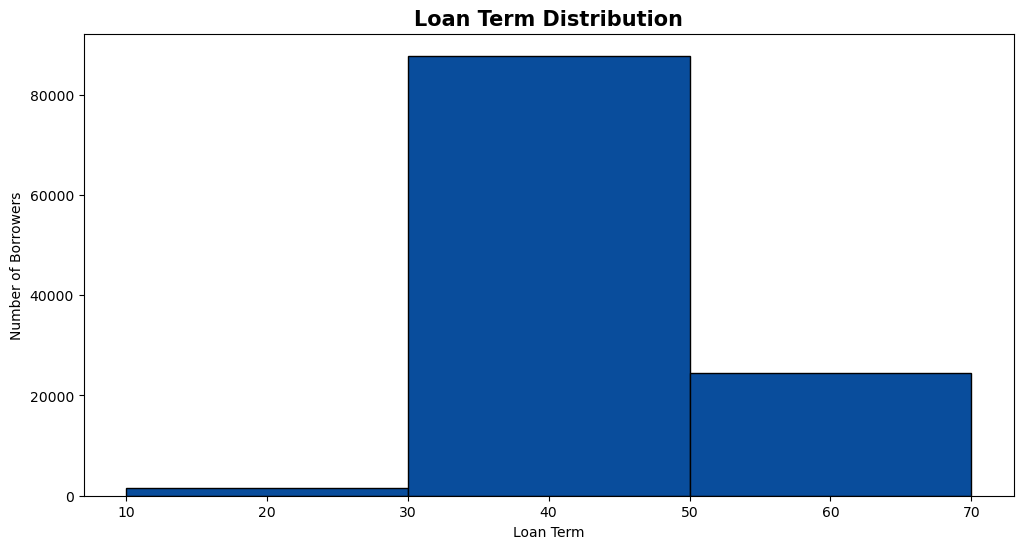

In [10]:
#create figure to plot the data


#plot the histogram
def hist(x,bins,color='#094D9C', edgecolor='black'):
    plt.figure(figsize=(12,6))
    plt.hist(x,bins, color='#094D9C', edgecolor='black')

#create bins for the histogram
bins = np.arange(10, p['Term'].max()+21, 20)

hist(x=p.Term,bins=bins)
# plt.hist(x=p.Term, bins=bins , color= '#094D9C',edgecolor ='black')

#Add labels and title
plt.xlabel('Loan Term')
plt.ylabel('Number of Borrowers')
plt.title('Loan Term Distribution',  fontsize=15, fontweight='bold');


* The majority of the loans given fall between 30 - 50 months 

**What are the credit Grades of the borrowers that obtained loans?**

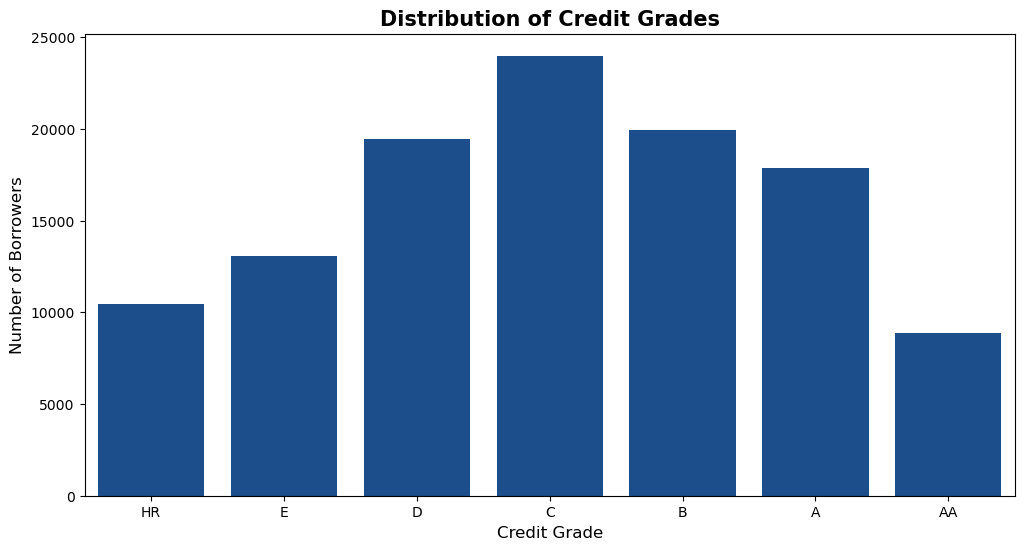

In [11]:
#plot the barchart using seaborn's countplot
plt.figure(figsize=(12,6))
sb.countplot(x=p.CreditGrade, color='#094D9C')

#Add labels and title
plt.xlabel('Credit Grade', fontsize=12)
plt.ylabel('Number of Borrowers', fontsize=12)
plt.title('Distribution of Credit Grades',  fontsize=15, fontweight='bold');

- The loans given seem to have a uniform distribution across the credit grades

**What is the debt to income ratio of the borrowers?**

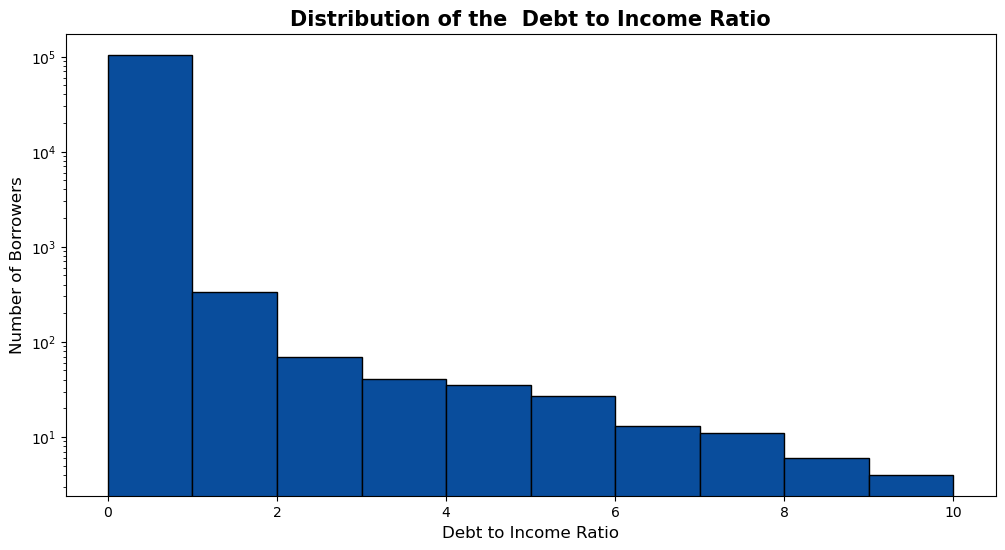

In [12]:
#plot the histogram
hist(x=p.DebtToIncomeRatio,bins=np.arange(0,11))
plt.yscale('log')

#add title and labels
plt.title('Distribution of the  Debt to Income Ratio', fontsize=15, fontweight='bold')
plt.xlabel('Debt to Income Ratio', fontsize=12)
plt.ylabel('Number of Borrowers', fontsize=12);


- Majority have a low debt to income ratio but a small portion of the borrowers have a large debt profile.

**What is the monthly repayment structure for the borrowers?**

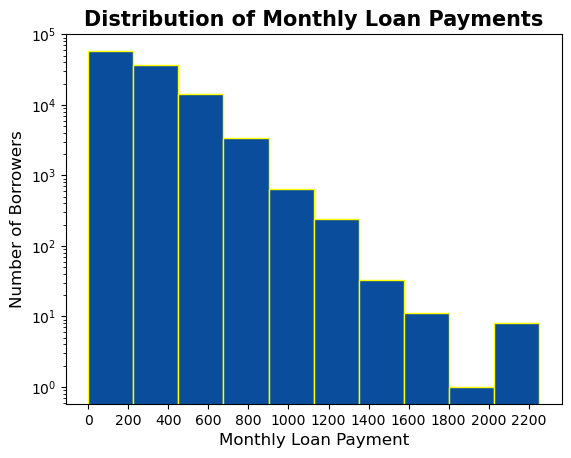

In [13]:
#plot the histogram
plt.hist( p.MonthlyLoanPayment, color='#094D9C', edgecolor='yellow', log=True)

#specify the xticks and orientation
plt.xticks(np.arange(0,2400,200), rotation=0)

#add title and labels
plt.title('Distribution of Monthly Loan Payments',fontsize=15, fontweight='bold')
plt.xlabel('Monthly Loan Payment', fontsize=12)
plt.ylabel('Number of Borrowers', fontsize=12);

- The monthly repayment is skewed to the right with a minority paying a larger sum monthly

**What is the monthly income of the borrowers?**

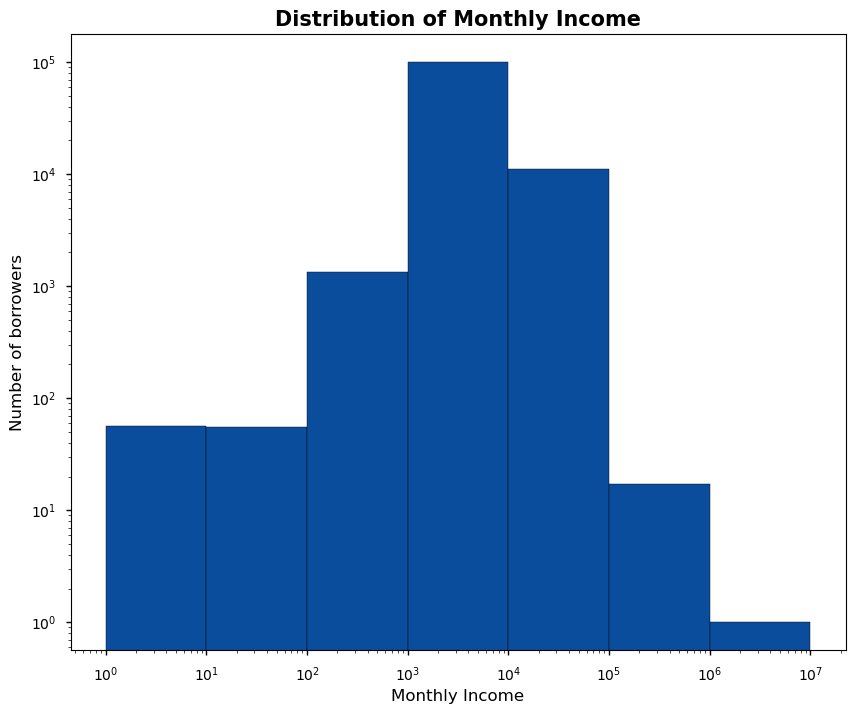

In [14]:
#view the spread of the data
p.StatedMonthlyIncome.describe()

#pick a style to plot with
plt.style.use('seaborn-notebook')
#create figure and define bin range
plt.figure(figsize=(10,8))
bins =10**np.arange(0,6.24+1.0, 1.0) 

#plot the histogram 
plt.hist(p.StatedMonthlyIncome, edgecolor='black',orientation='vertical', color='#094D9C', log=True, bins=bins, label='Monthly Income')

#define the scale on the x axis
plt.xscale('log')

#add title and labels
plt.title('Distribution of Monthly Income', fontsize=15, fontweight='bold')
plt.xlabel('Monthly Income', fontsize=12)
plt.ylabel('Number of borrowers',fontsize=12);

- The monthly income of the borrowers is slighly skewed to the left with majority falling in the middle of the income range

**What is the loan amount taken by borrowers?**

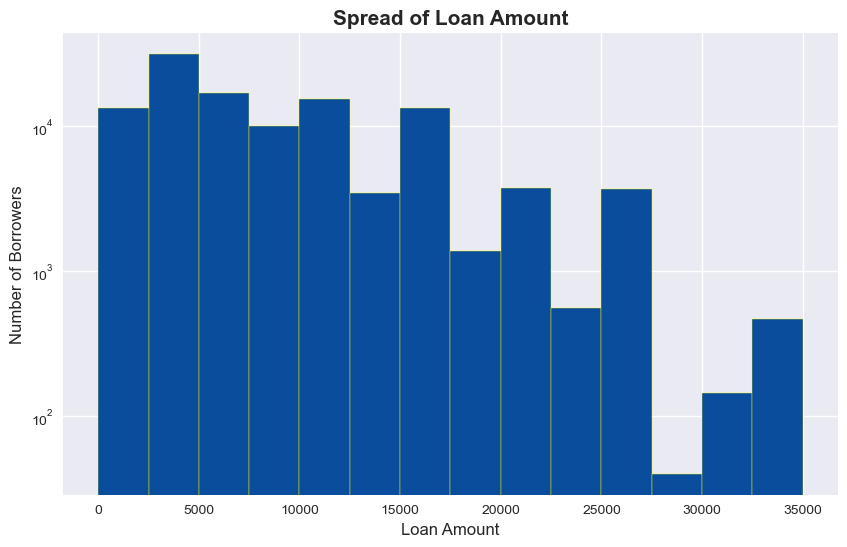

In [15]:
#define plot style
plt.style.use('seaborn')

#create figure
plt.figure(figsize=(10,6))

#define the xticks and the bin size the histogram
ticks = np.arange(0,p.LoanOriginalAmount.max()+5000, 5000)
bins= np.arange(0,p.LoanOriginalAmount.max()+2500, 2500)

#plot the histogram
plt.hist(p.LoanOriginalAmount, edgecolor='yellow',color='#094D9C', bins=bins)

#apply the xticks and the label to show
plt.xticks(ticks, label=ticks)

#define the y axis on alog scale
plt.yscale('log')

#apply the title and labels 
plt.title('Spread of Loan Amount',  fontsize=15, fontweight='bold')
plt.xlabel('Loan Amount',fontsize=12)
plt.ylabel('Number of Borrowers', fontsize=12);

* The loan amount is skewed to the right with majority of borrowers falling in the low range of the loan amount range

**What are the categories of the loans taken? closed? defaulted? etc**

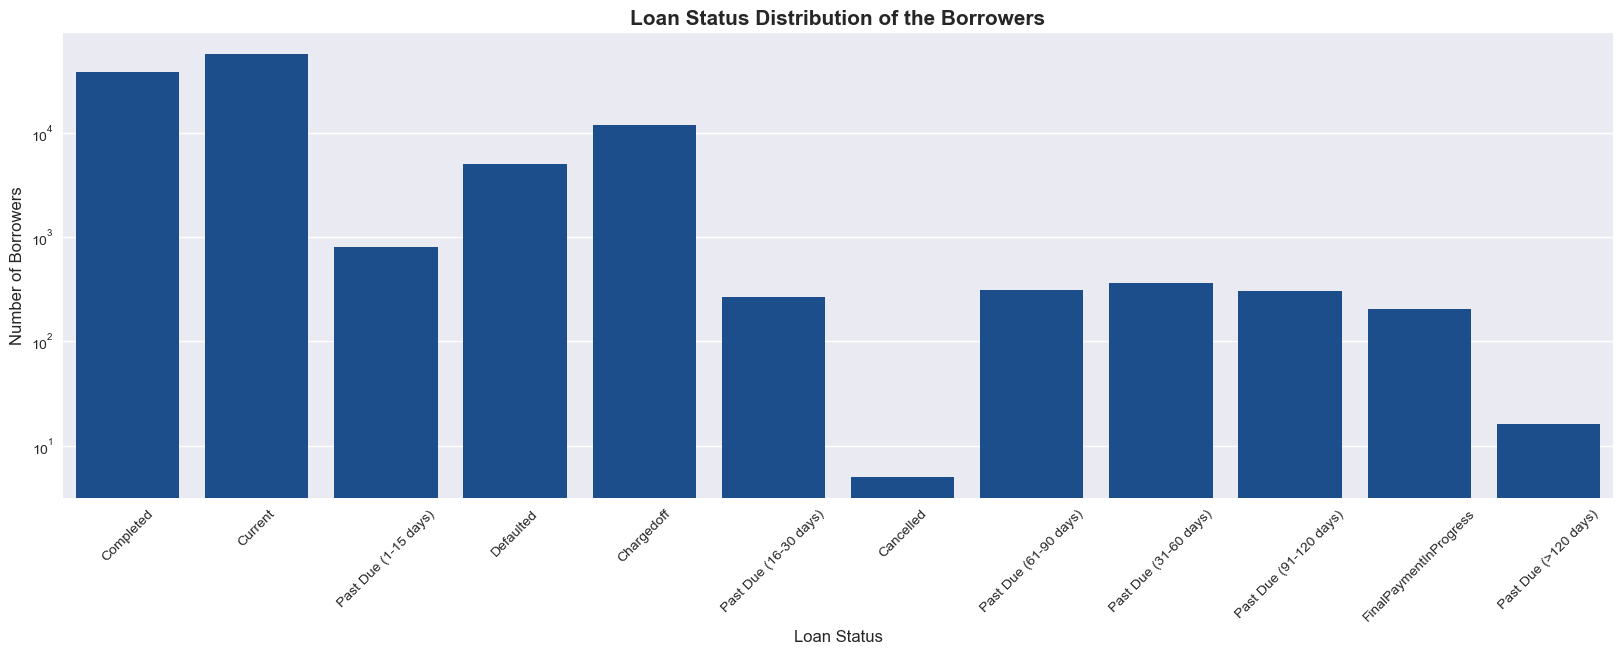

In [16]:
#create figure and add axis
fig=plt.figure(figsize=(20,6))
ax = fig.add_axes([.125,.125,.775,.775])

#plot the bar chart and apply the xticks
sb.countplot(x = p.LoanStatus, ax=ax,color= '#094D9C', log=True, label='Loan status types')
plt.xticks(rotation=45)

#add title and labels
plt.title('Loan Status Distribution of the Borrowers',fontsize=15, fontweight= 'bold')
plt.xlabel('Loan Status',fontsize=12)
plt.ylabel('Number of Borrowers',fontsize=12);

*  Apart from the ongoing loans, majority of Borrowers paid of their loans while minority had it cancelled or due for over 120days

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* The loan status has 3 peaks. The first majority are ongoing or completed loans while the second peak consists of defaulted or chargedoff loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The Credit Grade is ordinal and therefore i had to apply the categorical data type to it.
- changed the loan status to an unordered category type
- change the date columns to datetime
- filled empty credit grade entries with the prosper grade equivalent 

## Bivariate Exploration

**What is the relationship between the loan status and the Debt to income ratio?**

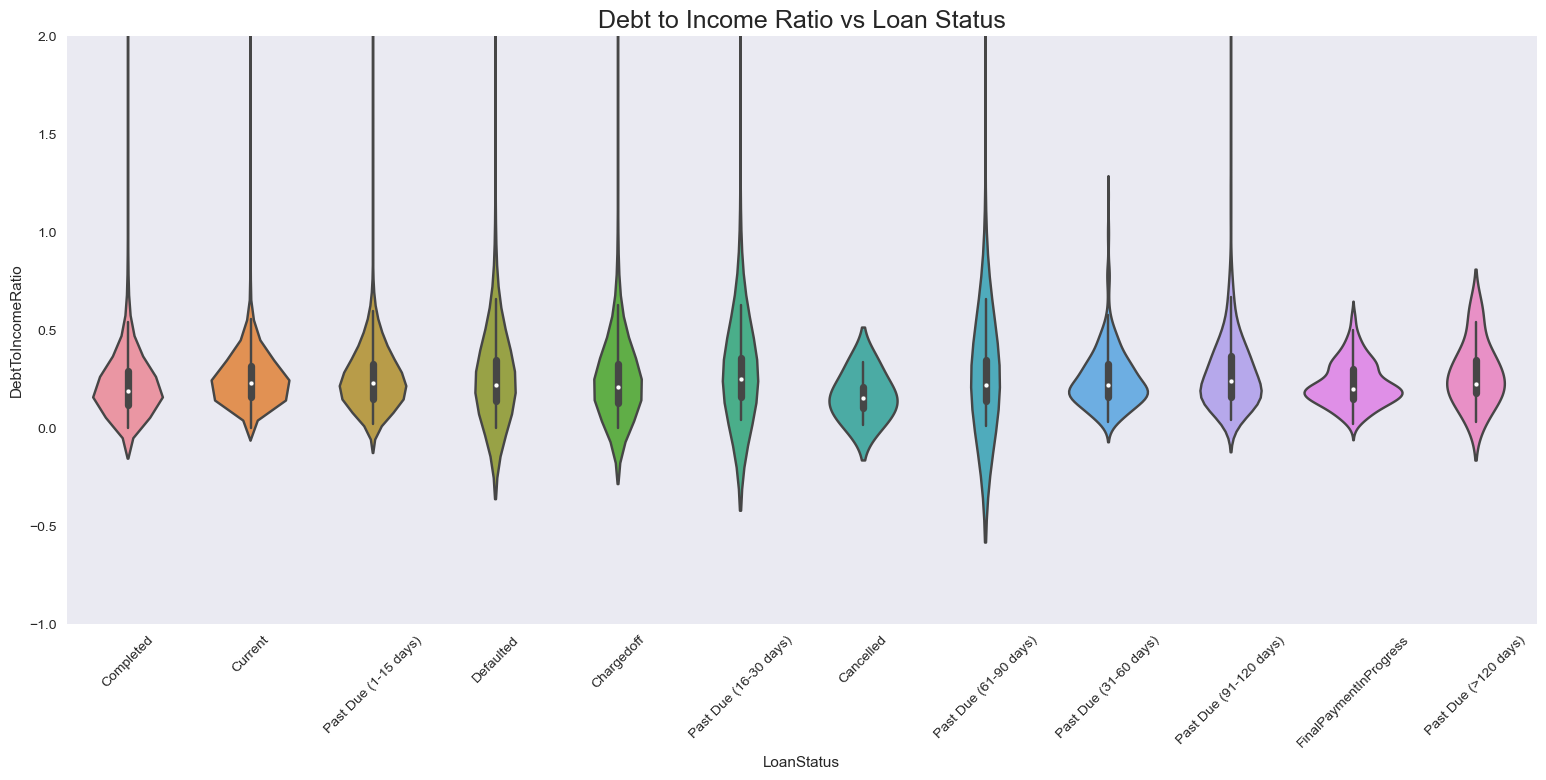

In [17]:
plt.style.use('_mpl-gallery-nogrid')
plt.figure(figsize=[15,6])
sb.violinplot( y=p.DebtToIncomeRatio, x=p.LoanStatus)
plt.title('Debt to Income Ratio vs Loan Status', fontsize=18)
plt.xticks(rotation=45)
plt.ylim(-1,2);

* The Debt to income spread looks similar across the different loan status although there are lots of outliers.

**What relationship exists between Loan Status vs Loan Amount and Loan status vs monthly payment?**

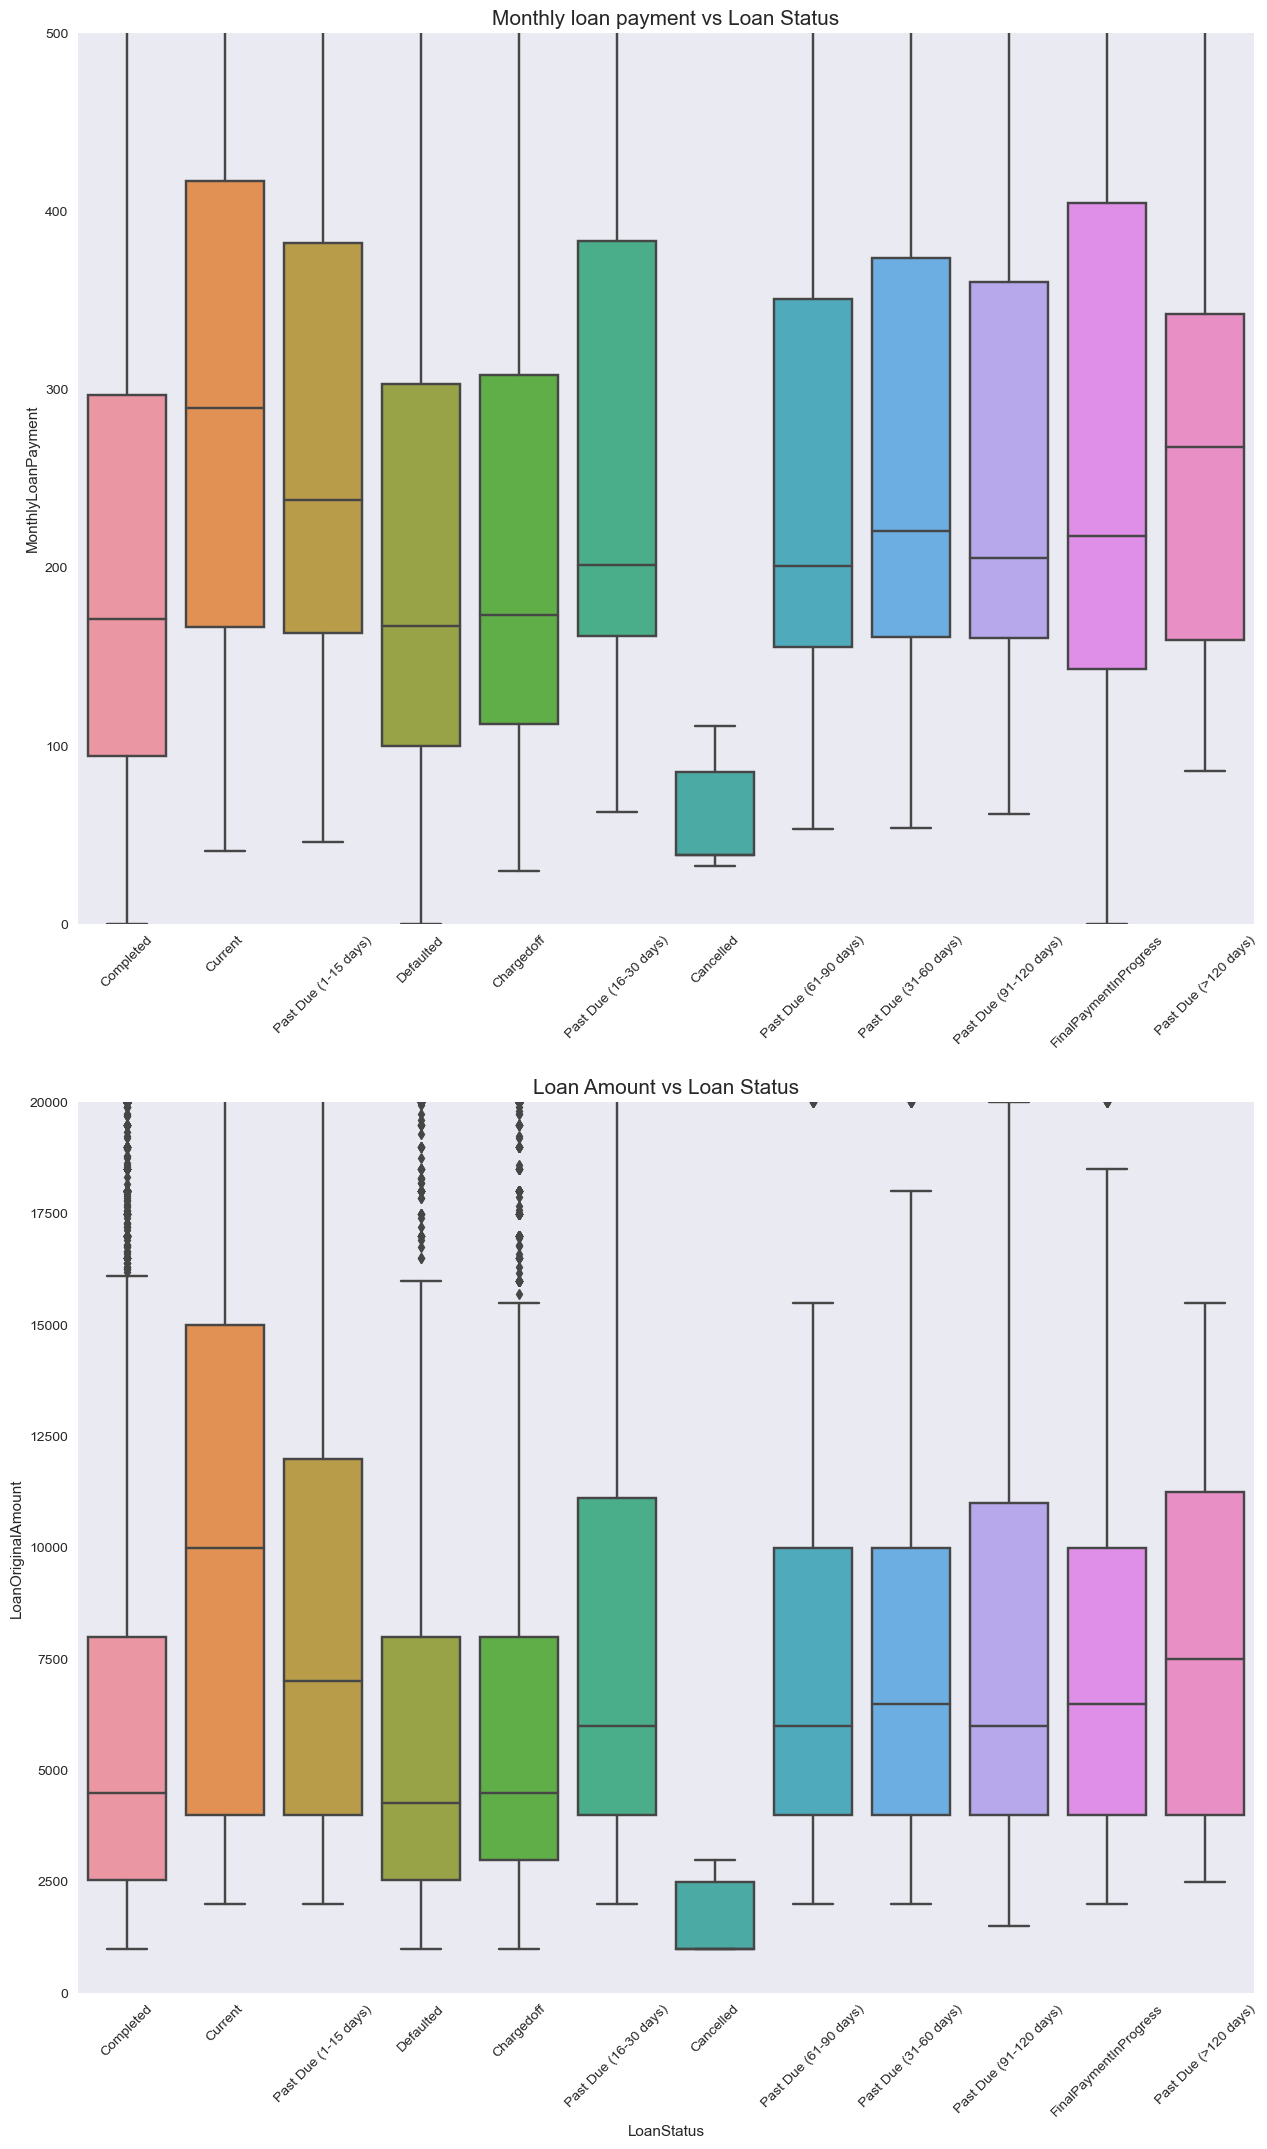

In [18]:
fig,ax=plt.subplots(nrows=2,figsize=(12,20))
a= ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted', 'Chargedoff', 'Past Due (16-30 days)','Cancelled',
'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'FinalPaymentInProgress', 'Past Due (>120 days)']
sb.boxplot(x=p.LoanStatus, y=p.MonthlyLoanPayment,ax=ax[0])
ax[0].set_title ('Monthly loan payment vs Loan Status', fontsize=15)
ax[0].set_xticklabels(a,rotation=45)
ax[0].set_xlabel('')
ax[0].set_ylim(0,500)
sb.boxplot(x=p.LoanStatus, y=p.LoanOriginalAmount,ax=ax[1])
ax[1].set_title('Loan Amount vs Loan Status',fontsize=15)
ax[1].set_ylim(0,20000)
plt.xticks(rotation=45);
# plt.ylim(0,500);

* The Loan amount and monthly loan payment showed no effect on the completed or defaulted status of the loan

**How do the numerical variables - (DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount) correlate with each other?**

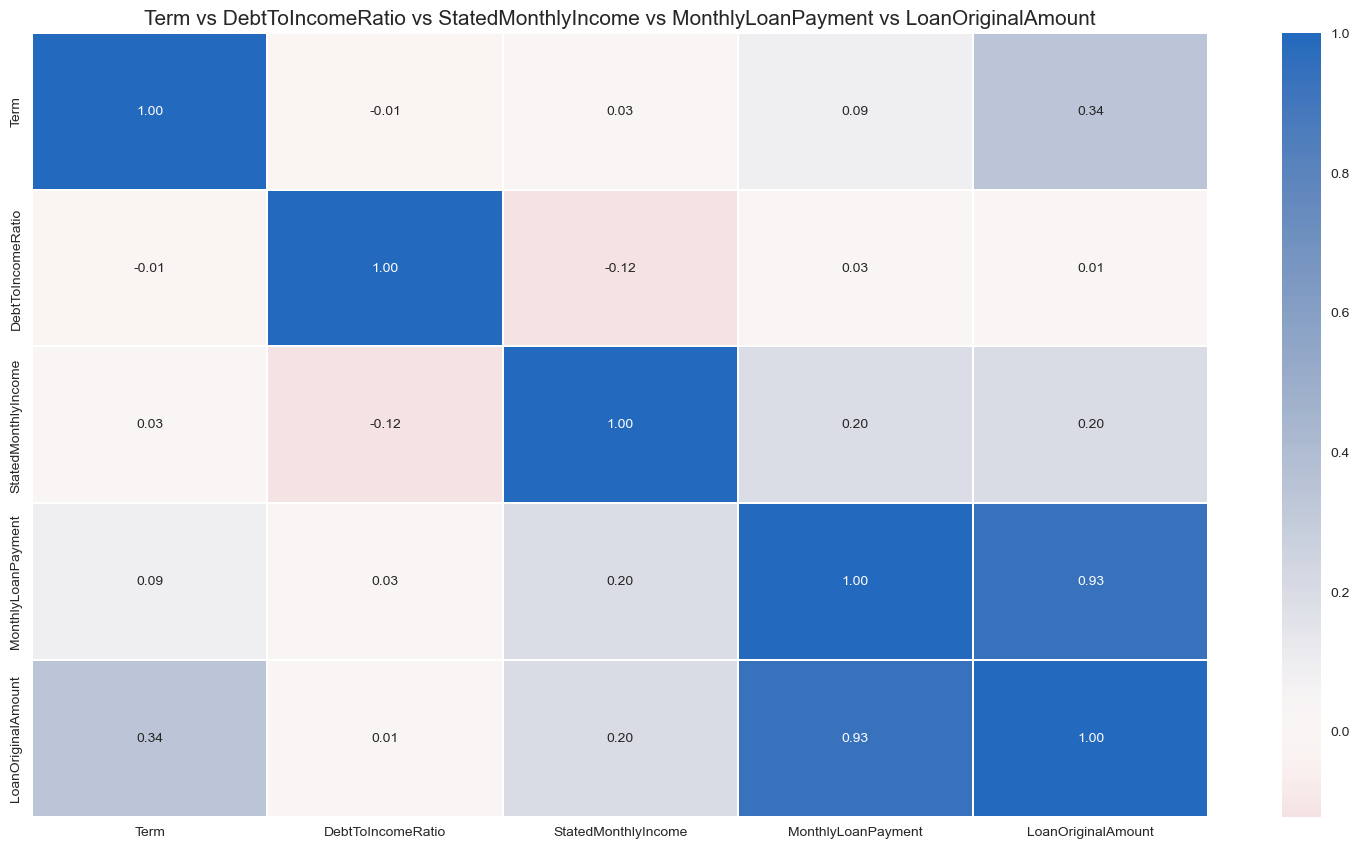

In [19]:
#plot the numerical variables against each other
numvar =['Term','DebtToIncomeRatio','StatedMonthlyIncome','MonthlyLoanPayment','LoanOriginalAmount']
plt.figure(figsize = [15,8])
sb.heatmap(p[numvar].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center=0, linewidths=0.3)
plt.title('Term vs DebtToIncomeRatio vs StatedMonthlyIncome vs MonthlyLoanPayment vs LoanOriginalAmount', fontsize=15);


* Only the Monthly Loan payment and the loan amount show correlation with each other.

**What relationship exists between the Loan status and the Loan Term?**

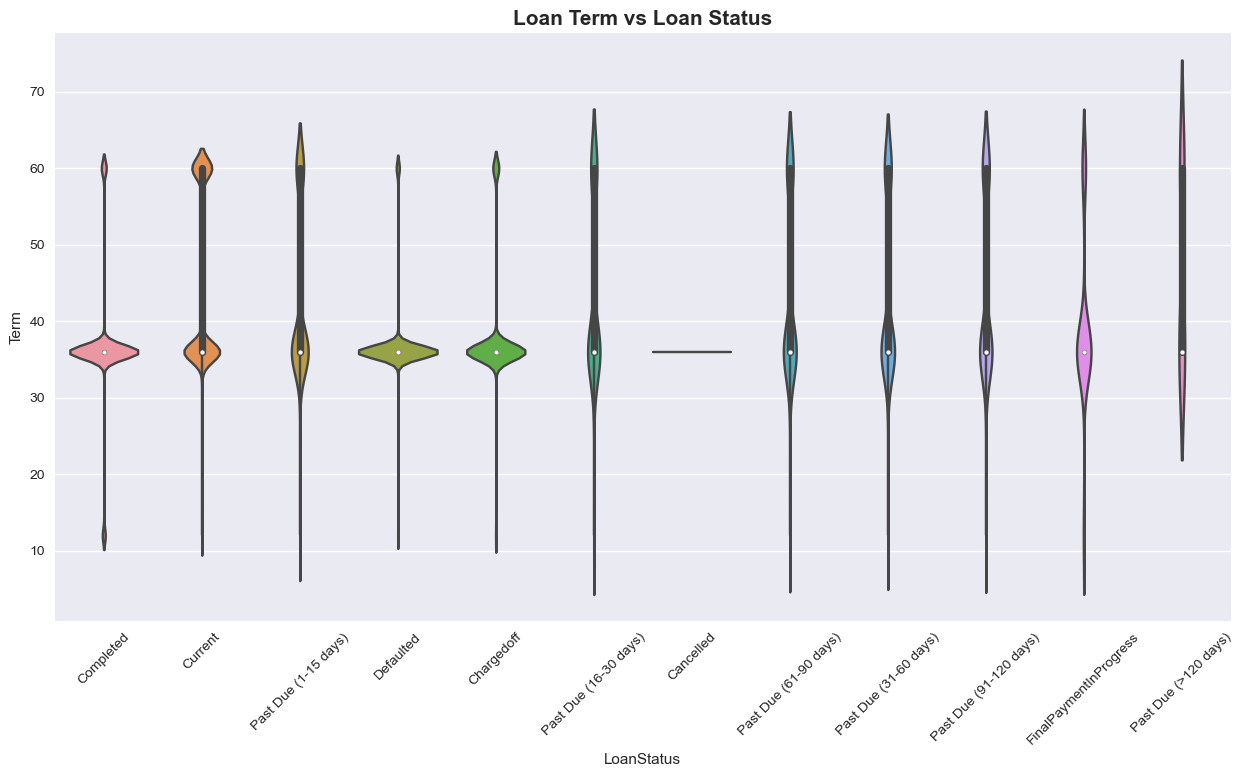

In [20]:
plt.style.use('seaborn')
plt.figure(figsize=[12,6])
sb.violinplot(y=p.Term, x=p.LoanStatus)
plt.title('Loan Term vs Loan Status',fontsize=15, fontweight='bold')
plt.xticks(rotation=45);

* The median of the Loan terms is between 30 and 40 months irrespective of the Loan status

**What is the relationship between the Credit Grade and the Loan Status?**

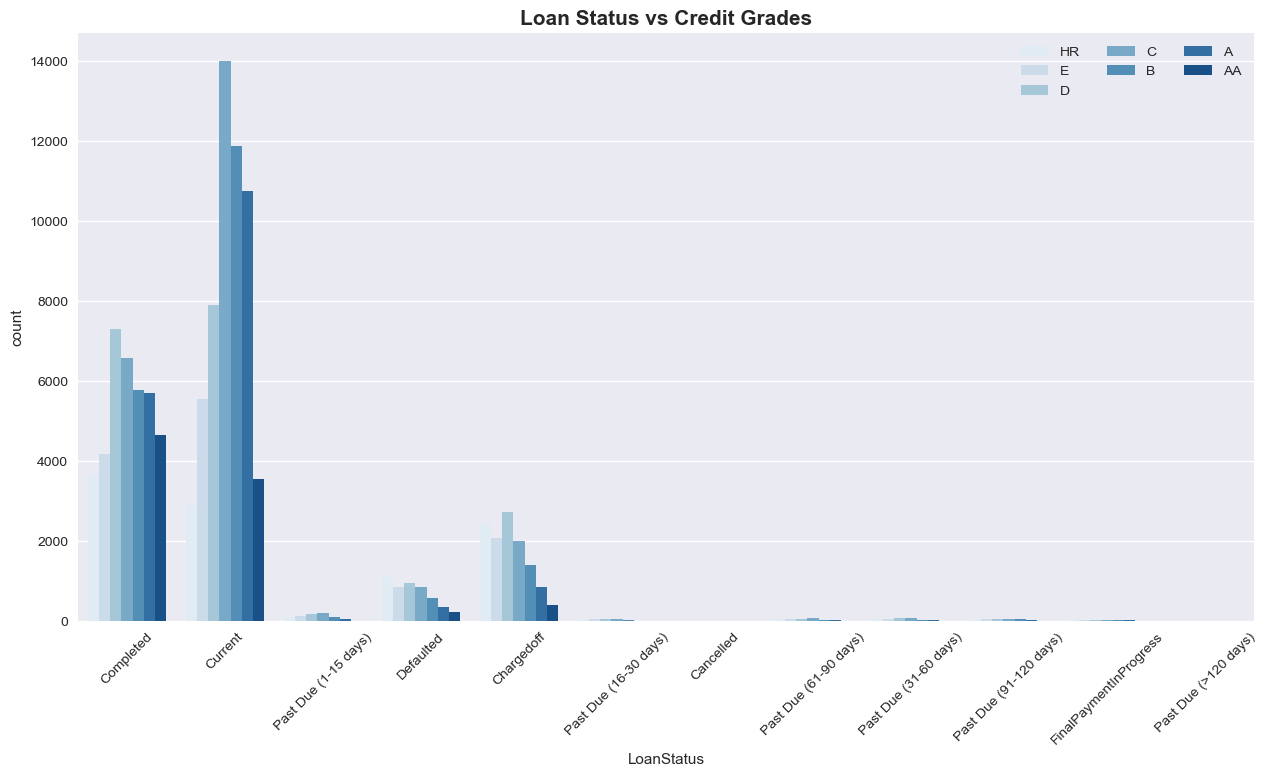

In [21]:
plt.figure(figsize=(12,6))
sb.countplot(data = p, x ='LoanStatus', hue = 'CreditGrade', palette = 'Blues')
plt.title('Loan Status vs Credit Grades',fontsize=15, fontweight='bold')
plt.legend(ncol=3, loc =1)
plt.xticks(rotation=45);

* Majority of the completed and ongoing loans fall in the D,C,B credit grades. The number of B,A and AA grades is ggreatly reduced for defaulted loans although they contribute a lot to the completed category. The credit grade seems to have an effect on the Status of the Loan.

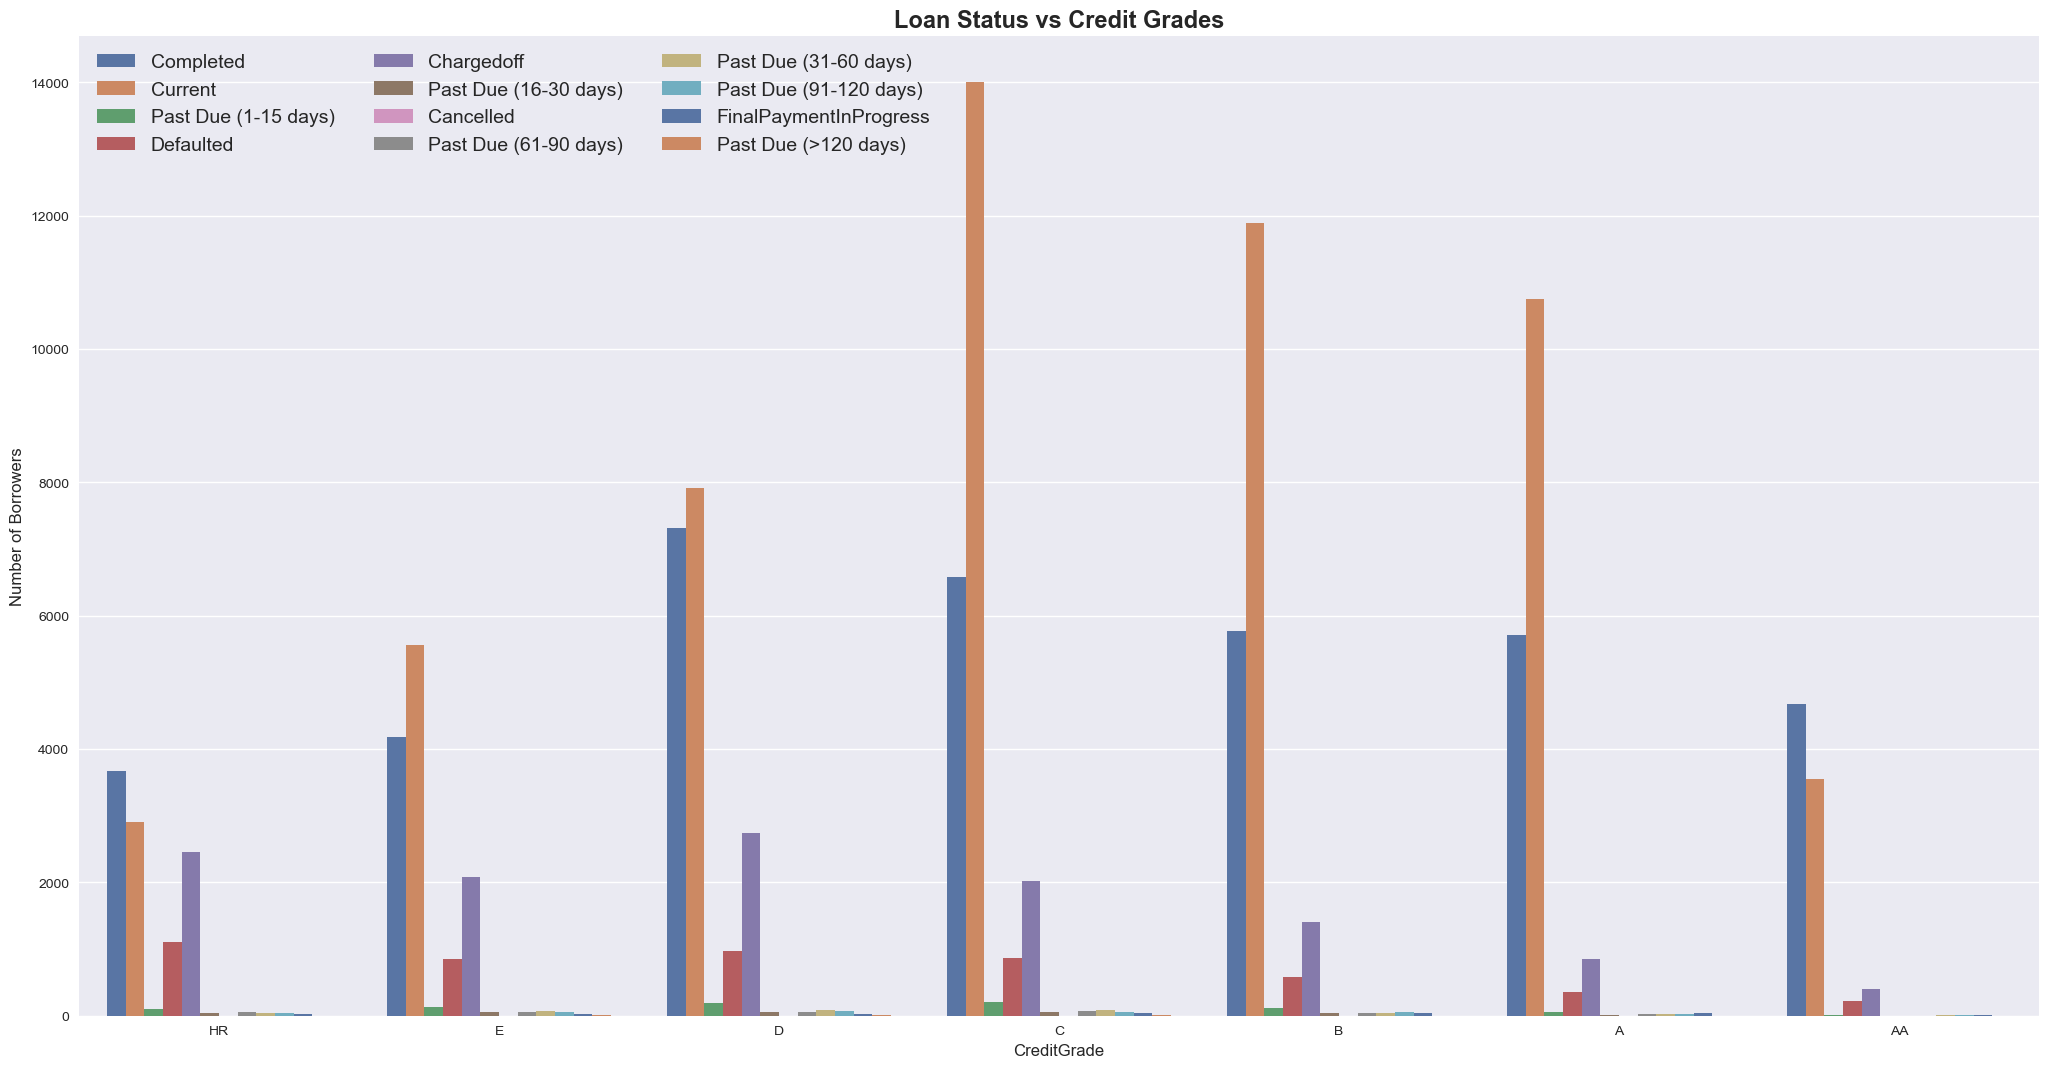

In [22]:
plt.figure(figsize=(20,10))
sb.countplot(data = p, hue ='LoanStatus', x = 'CreditGrade', palette = 'deep')
plt.title('Loan Status vs Credit Grades', fontsize=17, fontweight='bold')
plt.xlabel('CreditGrade', fontsize=12)
plt.ylabel('Number of Borrowers', fontsize=12)
plt.legend(ncol=3, loc =2,fontsize=14)
plt.xticks(rotation=0);

* The number of borrowers is higher in the completed loan category and this gap increases as the credit grade increases.

**What is the relationship between the Loan Status and the Stated Monthly income?**

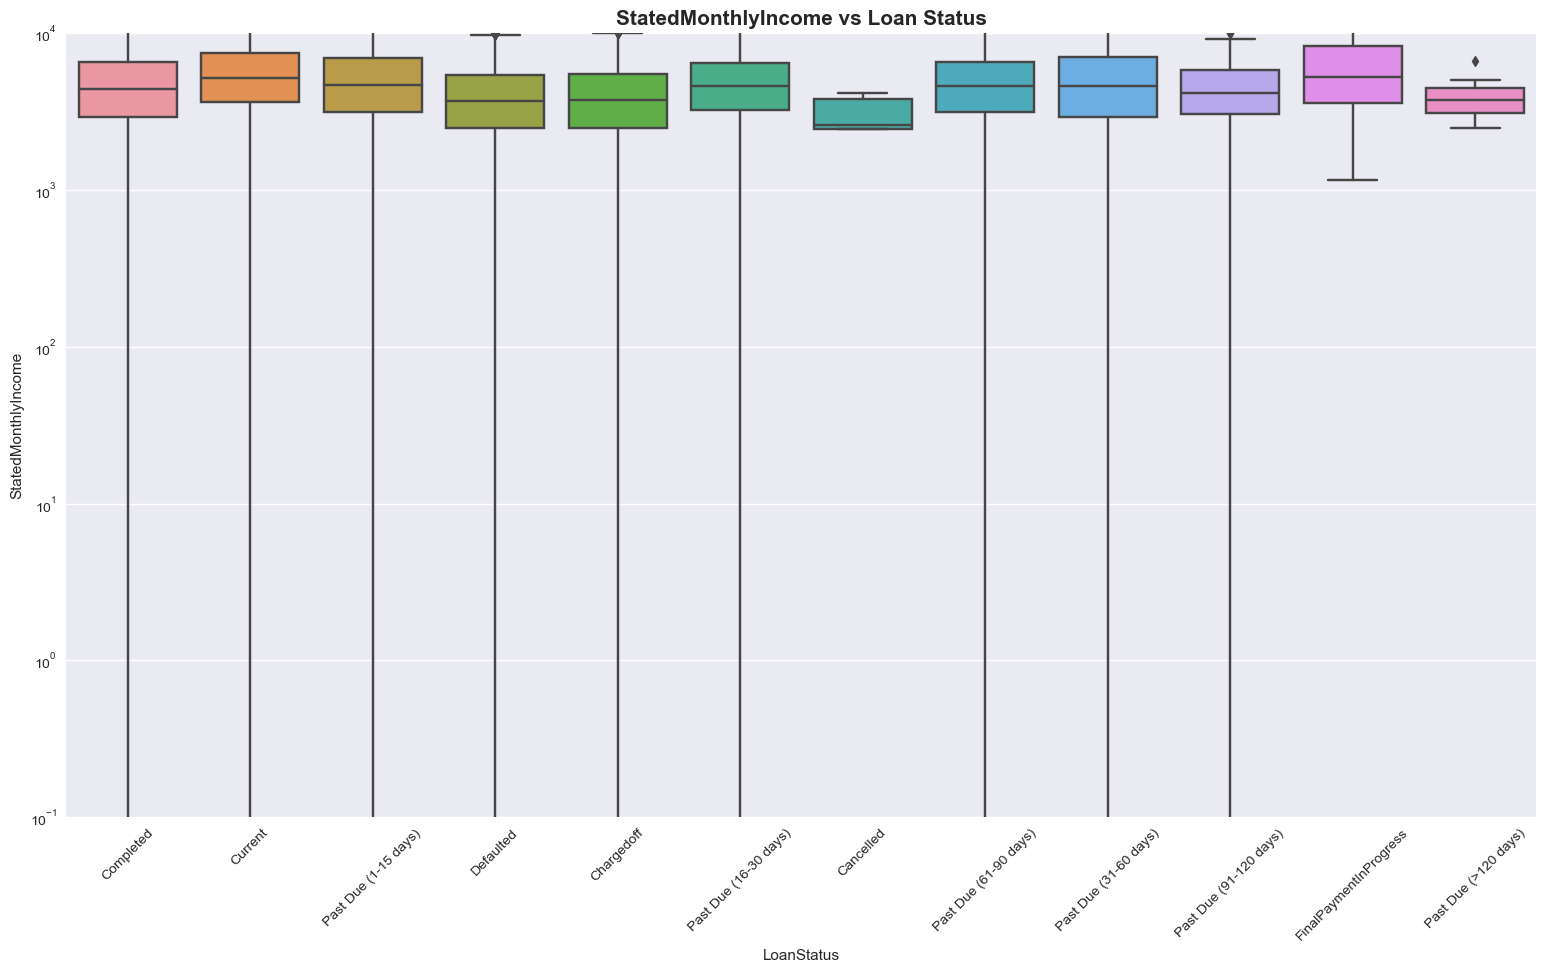

In [23]:
plt.style.use('seaborn')
plt.figure(figsize=[15,8])
sb.boxplot(data = p, y='StatedMonthlyIncome', x='LoanStatus')
plt.yscale('log')
plt.ylim(0.1,10**4)
plt.title('StatedMonthlyIncome vs Loan Status', fontsize=15, fontweight='bold')
plt.xticks(rotation=45);

* The monthly income is generally higher for those that completed their payments vs those that defaulted.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Of all the numerical variables considered, only the monthly loan payment and the loan amount showed correlation.
* The credit grade showed an effect on the status of the loan whether completed or default.
* The monthly income of the borrowers also affected their loan status

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* The  medium loan term for all the different loan status were around the same value.
* The debt to income ratio did not show correlation with the monthly payment or loan amount 

## Multivariate Exploration

**Relationship between Debt to income, monthly payment and loanstatus?**

<Figure size 1500x800 with 0 Axes>

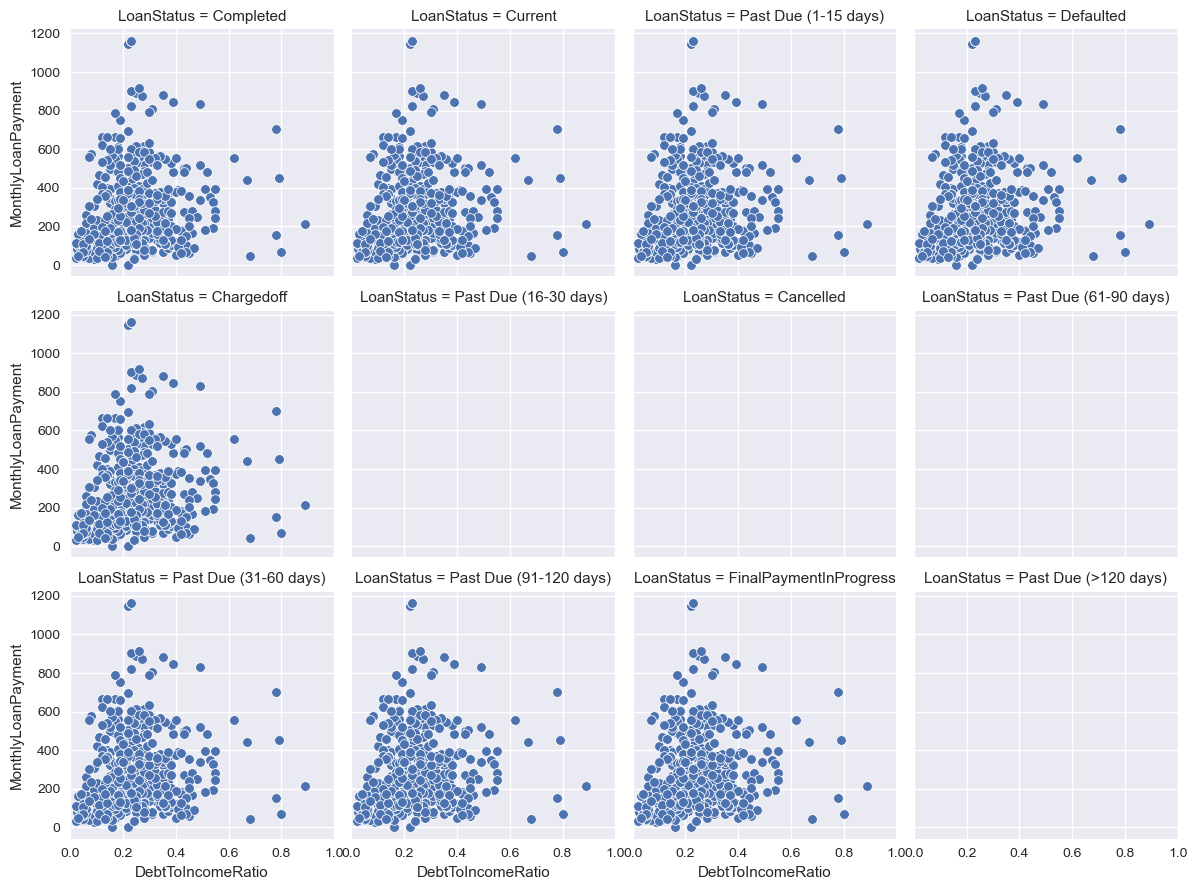

In [24]:
plt.figure(figsize=[15,8])
g=sb.FacetGrid(data=p_samp, col='LoanStatus', col_wrap=4)
g.map(sb.scatterplot,x=p_samp.DebtToIncomeRatio, y=p_samp.MonthlyLoanPayment, palette='viridis');
plt.xlim(0,1);

* There is no key insight from the Debt to income ratio against the Monthly payment and Loan Status.

**Relationship between the stated monthly income vs Loanstatus vs creditgrade vs Loanterm?**

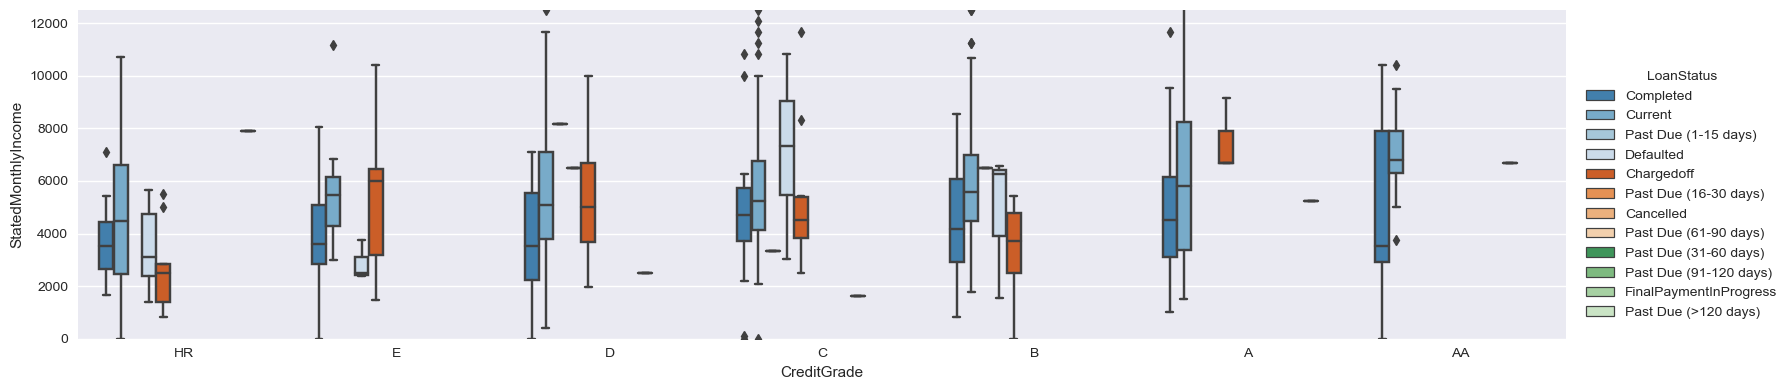

In [32]:
sb.catplot(data=p_samp,y='StatedMonthlyIncome', hue='LoanStatus', x='CreditGrade',aspect=4, height=4, kind='box',
palette='tab20c')
plt.ylim(0,12500);

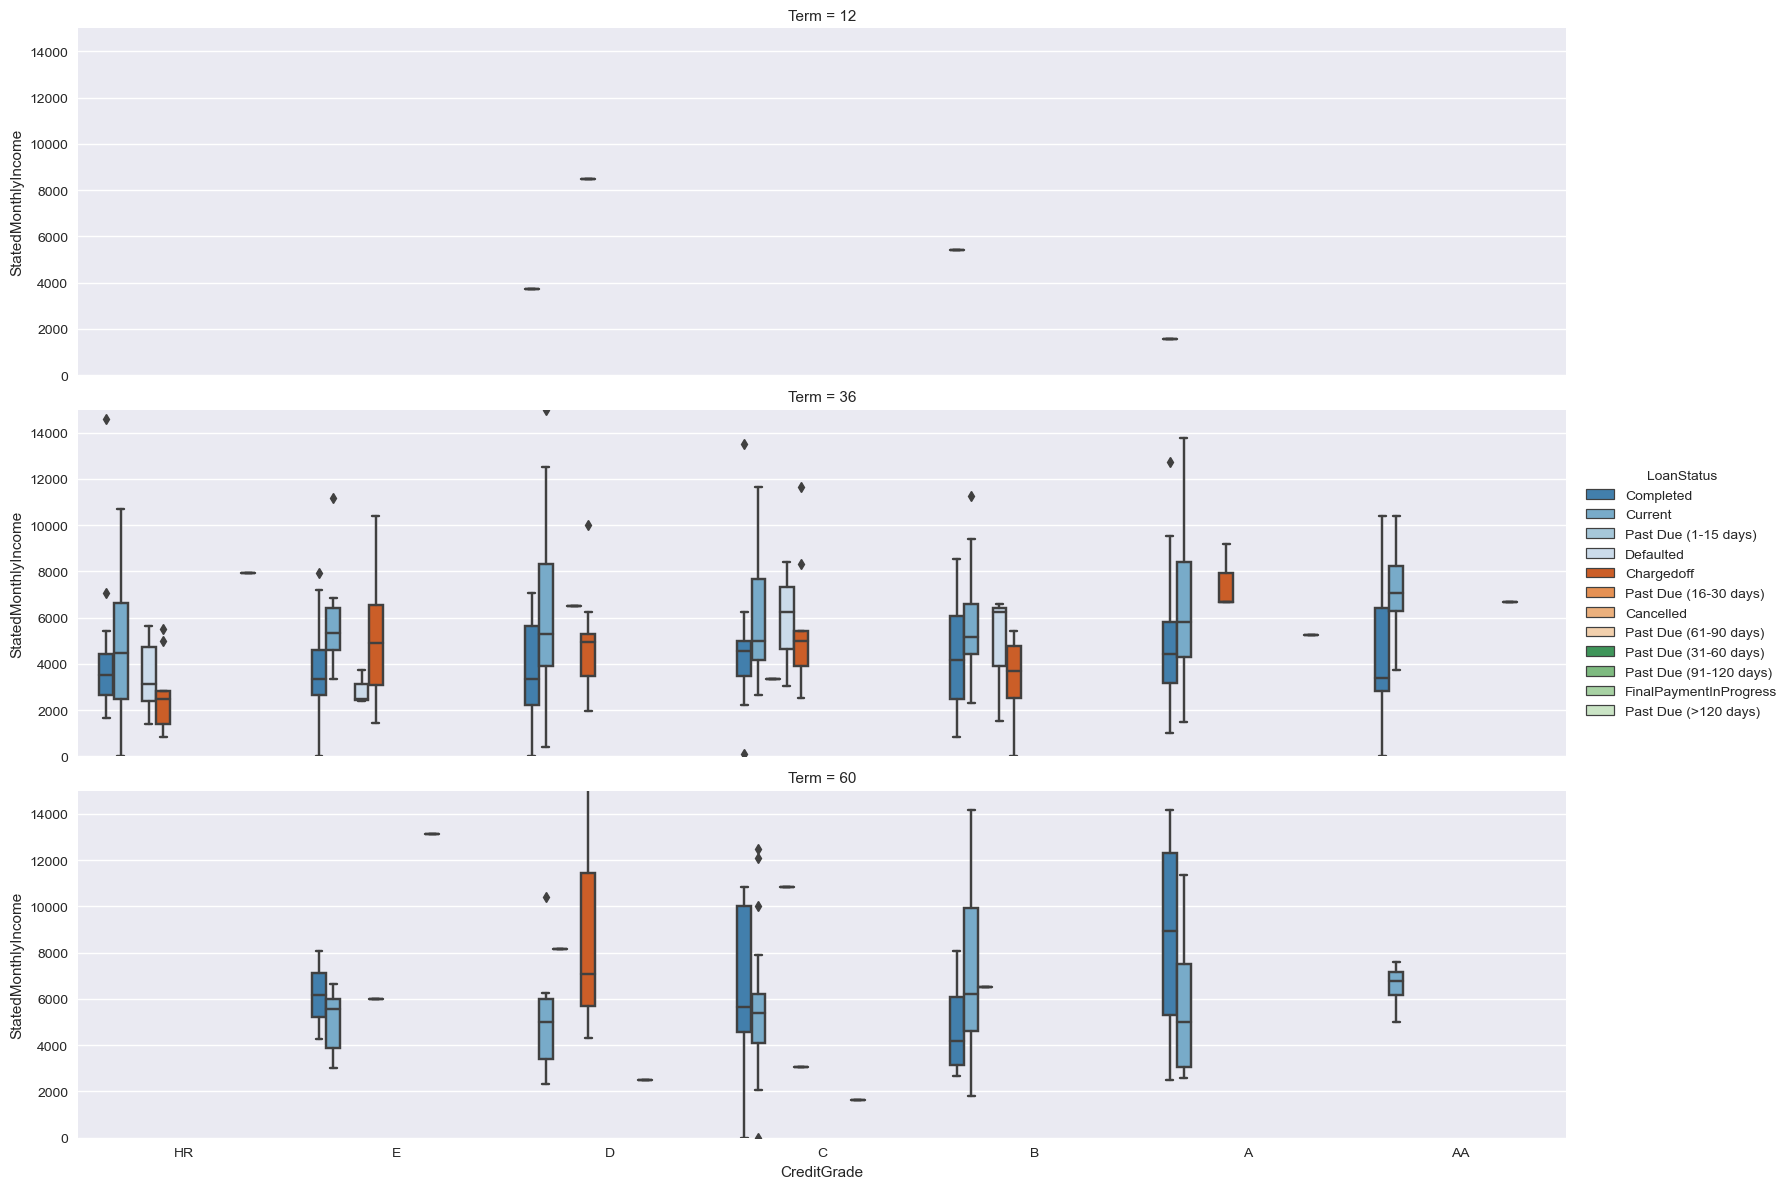

In [26]:

sb.catplot(data=p_samp,y='StatedMonthlyIncome', hue='LoanStatus', x='CreditGrade',aspect=4, height=4, kind='box',
palette='tab20c', row='Term')
plt.ylim(0,15000);


* As the credit grade increases, the mean monthly income of the defaulted borrowers remains lower than the those of the completed borrowers. However, as the loan term increases from 36- 60 months,there is no appearnace of a defaulter-class borrower because they had probably defaulted on the loan.
* The defaulters are majorly in the 36 month loan category
* The longer the loan term, the higher the chances of a default.

**Relationship between the monthlypayment vs loanamount vs creditgrade?**

<Figure size 1500x1000 with 0 Axes>

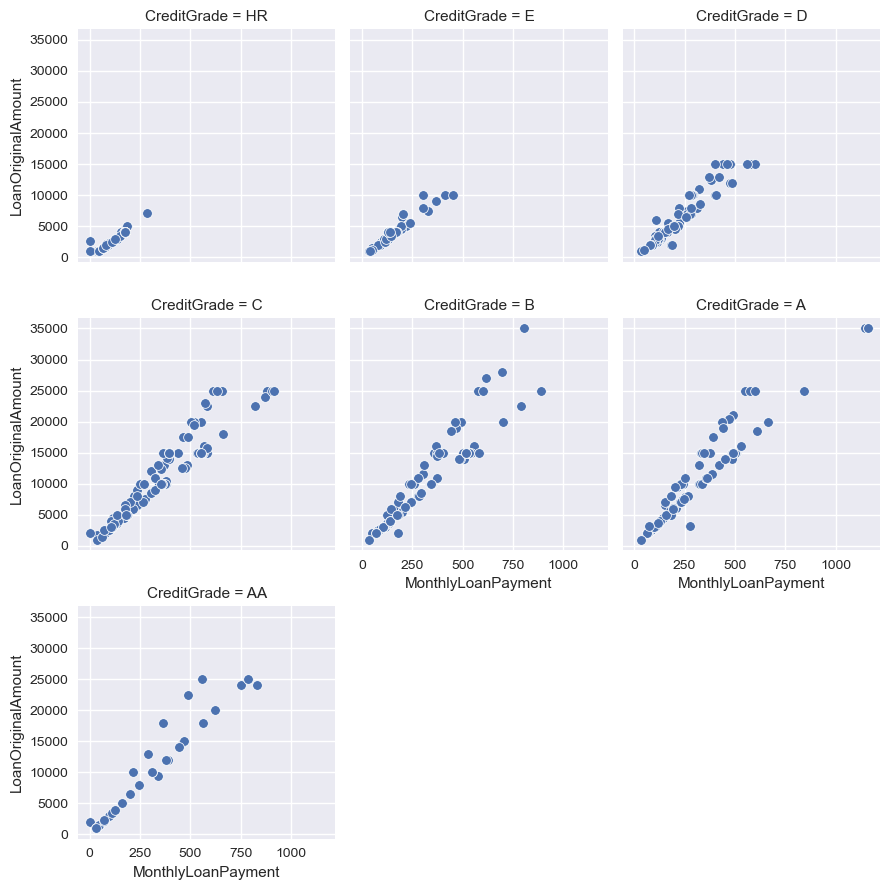

In [27]:
plt.figure(figsize=[15,10])
g = sb.FacetGrid(data = p_samp, col='CreditGrade',col_wrap = 3)
g.map_dataframe(sb.scatterplot, x= 'MonthlyLoanPayment', y='LoanOriginalAmount');

* All graphs show the same result. no insight to be extracted.

**Relationship between the monthlypayment vs loanamount vs loanstatus?**

<Figure size 1500x500 with 0 Axes>

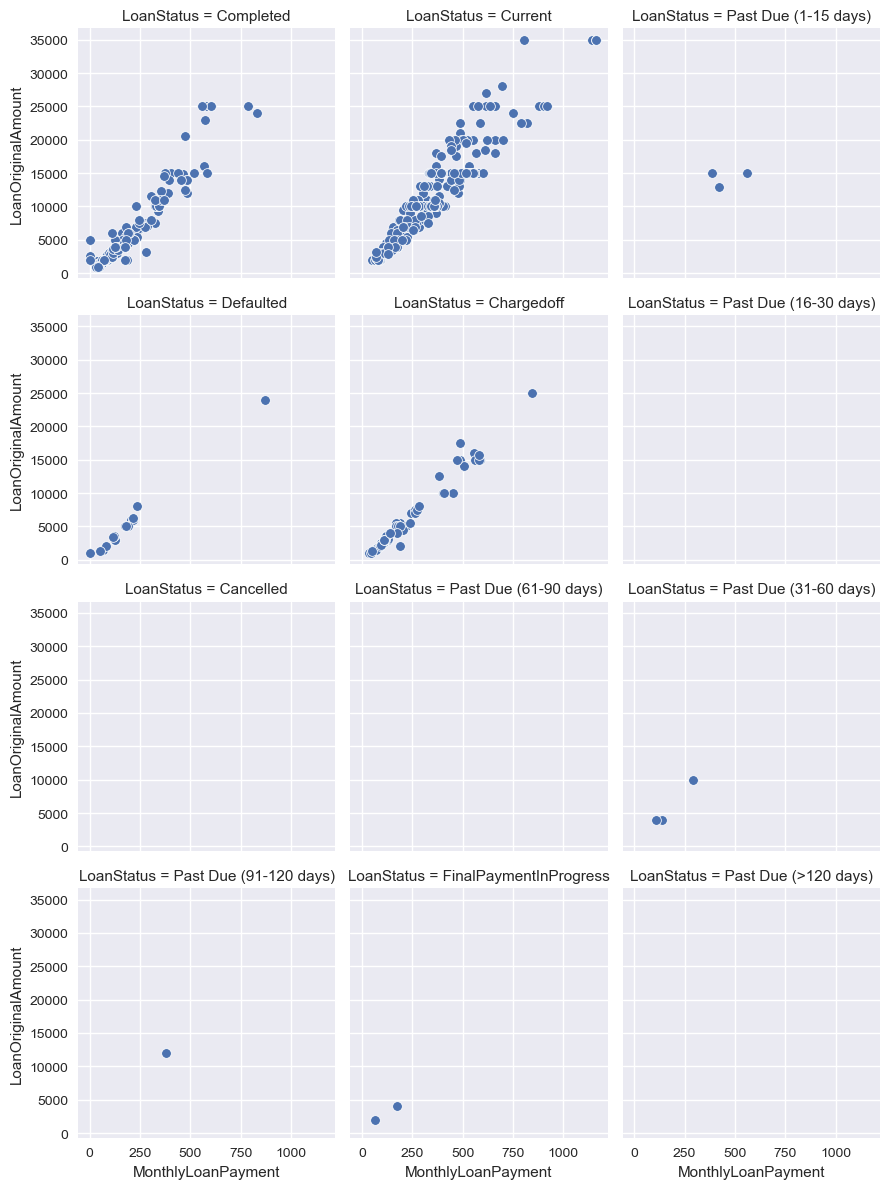

In [28]:
plt.figure(figsize=[15,5])
g = sb.FacetGrid(data = p_samp, col='LoanStatus', col_wrap = 3, height=3)
g.map_dataframe(sb.scatterplot, x= 'MonthlyLoanPayment', y='LoanOriginalAmount');

* The higher the Loan amount and the monthly payment, the higher the chances of an incomplete loan repayment.

**Stated Monthly income vs the Loan Amount by the Loan Status**

<Figure size 1500x500 with 0 Axes>

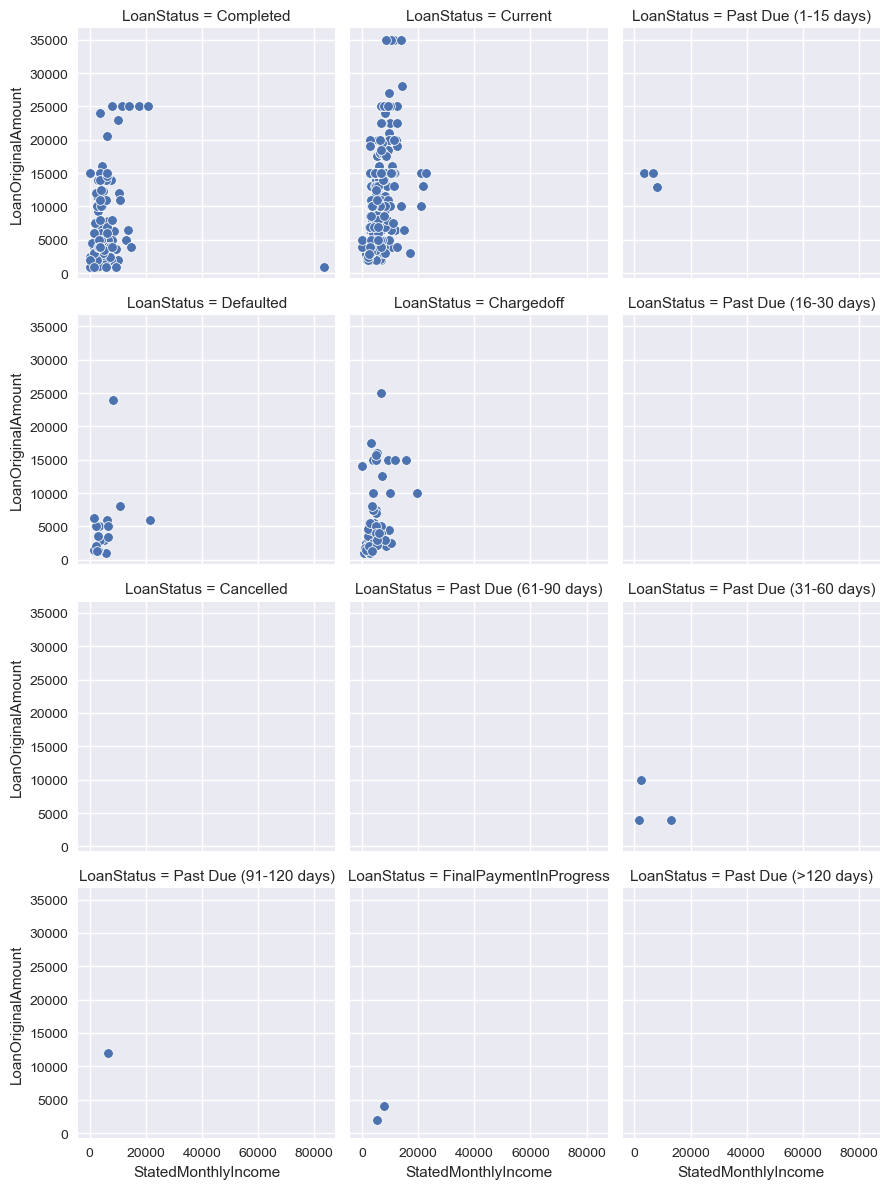

In [29]:
plt.figure(figsize=[15,5])
g = sb.FacetGrid(data = p_samp, col='LoanStatus', col_wrap = 3, height=3)
g.map_dataframe(sb.scatterplot, x= 'StatedMonthlyIncome', y='LoanOriginalAmount');

* For completed loans, an increase in the monthly repayment amount was accompanied by an increase in the stated monthly income. This might explain why they were able to pay off the loans.

**Relationship between the monthlypayment vs loanstatus vs creditgrade?**

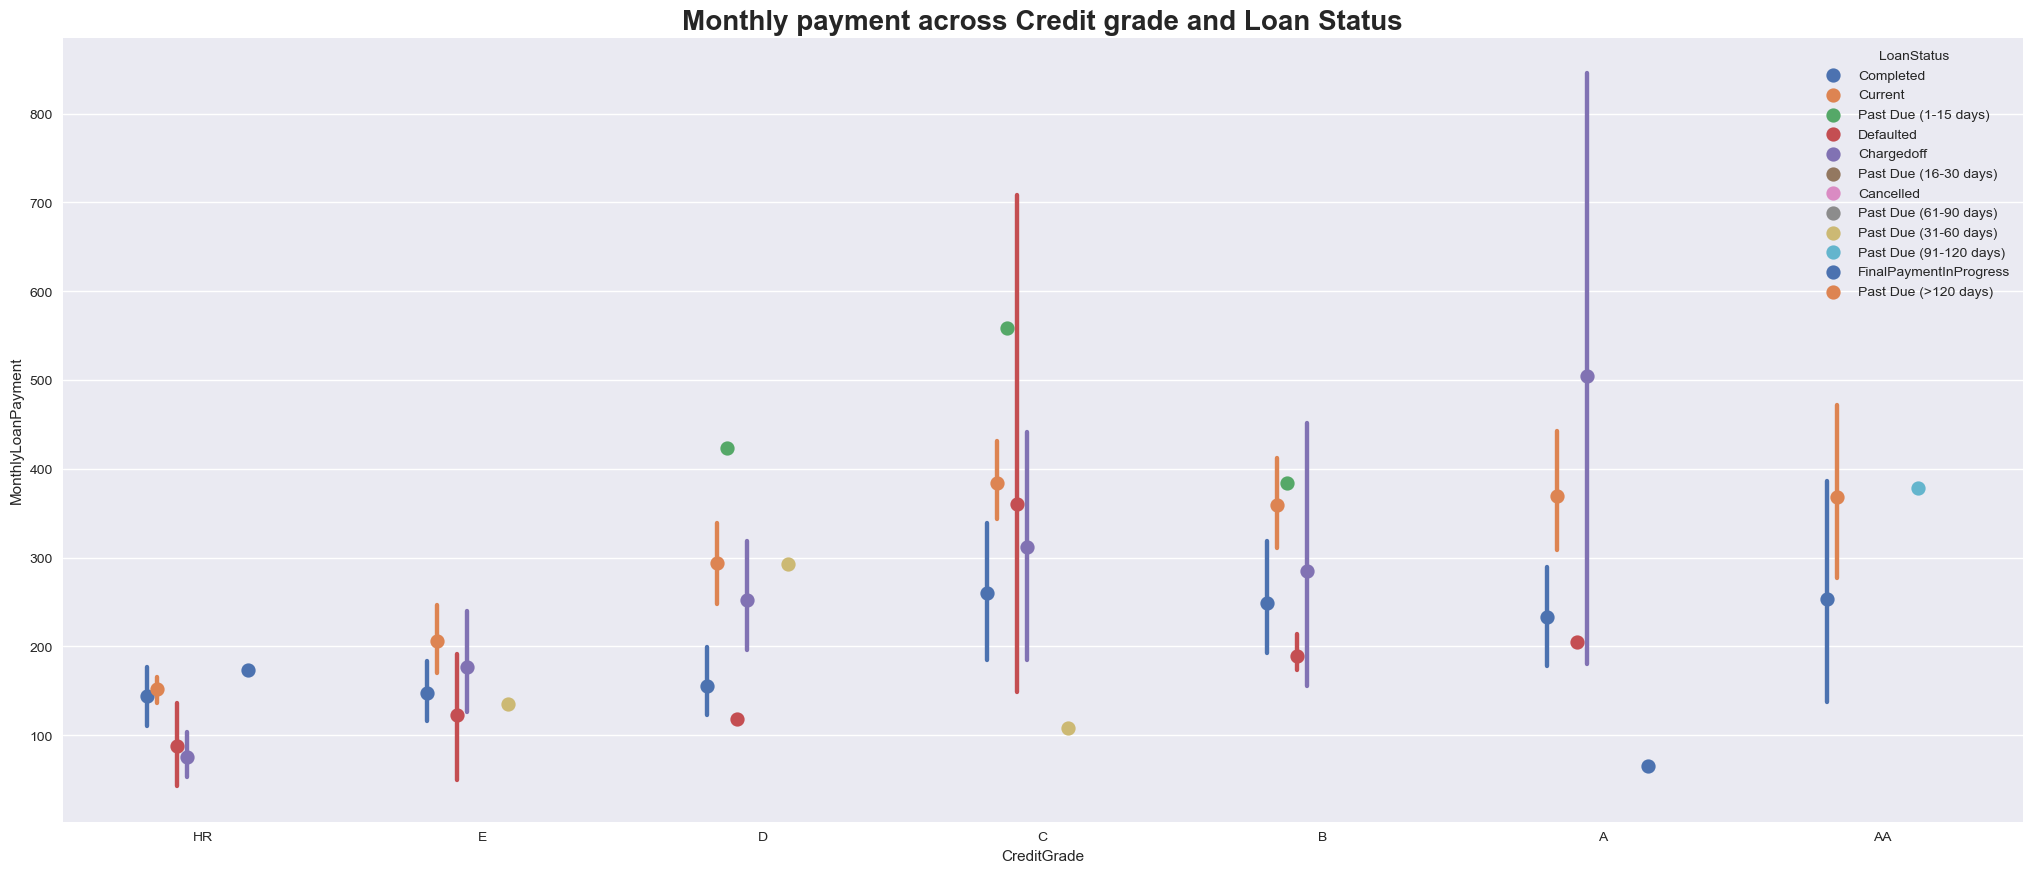

In [30]:
fig=plt.figure(figsize=(20,8))
g=sb.pointplot(data=p_samp, x='CreditGrade', y='MonthlyLoanPayment', hue='LoanStatus',palette='deep',linestyles='',dodge=0.4)
g.set_title('Monthly payment across Credit grade and Loan Status', fontsize=20, fontweight='bold');

* For completed loans, the mean monthly payment were highest for the B, A and AA credit Grades while it was highest for the defaulted category at credit grade c

**Relationship between the monthlypayment vs loanamount vs term?**

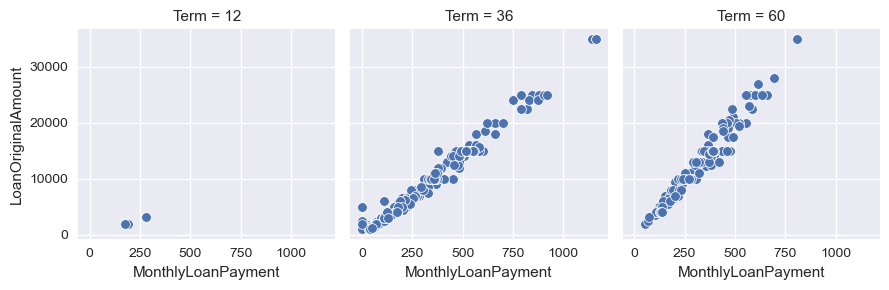

In [31]:
g=sb.FacetGrid(data=p_samp, col ='Term', col_wrap = 3)
g.map(sb.scatterplot ,'MonthlyLoanPayment','LoanOriginalAmount')
plt.show()

* As the loan term increases, a little increase in the loan amount results in a larger increase in the monthly loan payment.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* If the stated monthly income is proportional to the monthly payment, there is a higher chance the loan payment will be completed
* The tenor of the loan actually has an effect on the completed or defaulted status of the loan

### Were there any interesting or surprising interactions between features?

* The monthly loan payment against the loan amount did not show any insight for the different loan status

## Conclusions

* The Credit grade has an effect on the status of the loan
* The longer the tenor of the loan, the higher the chances of a default.
* The monthly income is generally greater for those that completed vs those that defaulted
